# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Gestion de l'affichage (directment dans le notebook)
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Cargement du dataset initial
df = pd.read_csv('../data/data.csv')

In [4]:
# Infromations générales du le dataset initial
print("------ Dimensions du dataset ------")
print(f"Lignes: {df.shape[0]}, Colonnes: {df.shape[1]}")

print("\n------ Informations générales et types de données ------")
df.info()

print("\n------ Aperçu des premières lignes ------")
print(df.head())

print("\n------ Statistiques descriptives pour les variables numériques ------")
print(df.describe().T)

------ Dimensions du dataset ------
Lignes: 67352, Colonnes: 32

------ Informations générales et types de données ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67352 entries, 0 to 67351
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  67352 non-null  object 
 1   NUMBER_OF_REQUESTS  67352 non-null  int64  
 2   TOTAL_DURATION      67352 non-null  int64  
 3   AVERAGE_TIME        67352 non-null  float64
 4   STANDARD_DEVIATION  52945 non-null  float64
 5   REPEATED_REQUESTS   67352 non-null  float64
 6   HTTP_RESPONSE_2XX   67352 non-null  float64
 7   HTTP_RESPONSE_3XX   67352 non-null  float64
 8   HTTP_RESPONSE_4XX   67352 non-null  float64
 9   HTTP_RESPONSE_5XX   67352 non-null  float64
 10  GET_METHOD          67352 non-null  float64
 11  POST_METHOD         67352 non-null  float64
 12  HEAD_METHOD         67352 non-null  float64
 13  OTHER_METHOD        67352 non


------ Pourcentage de valeurs manquantes par colonne ------
STANDARD_DEVIATION    21.390605
SF_REFERRER           21.390605
SF_FILETYPE           21.390605
dtype: float64


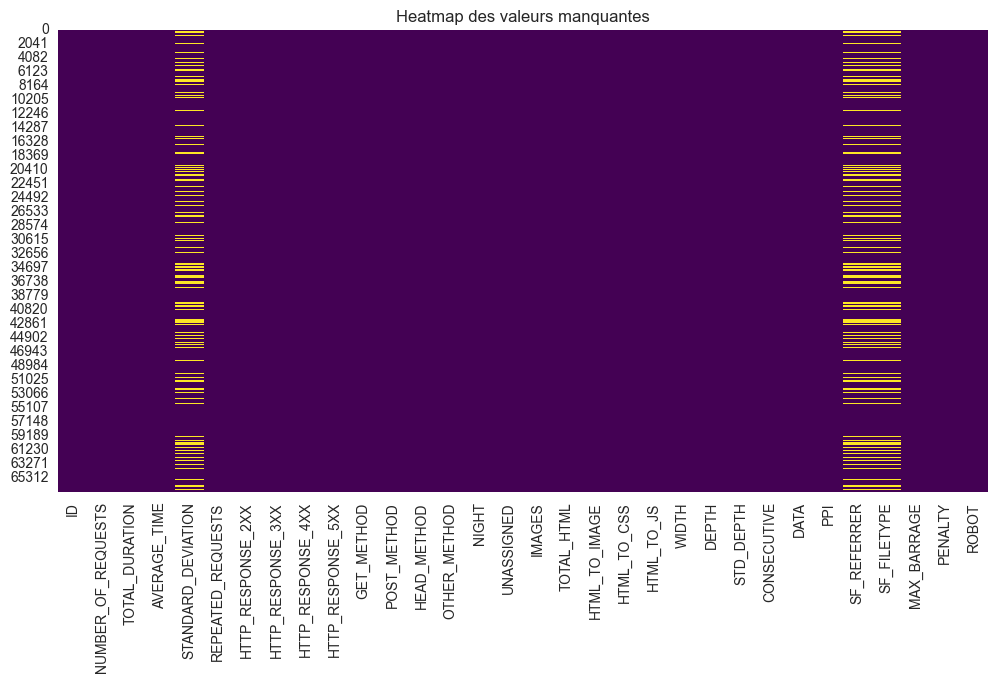

In [5]:
# Etude des valeurs manquates
print("\n------ Pourcentage de valeurs manquantes par colonne ------")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des valeurs manquantes')
plt.show()

Distribution des classes:
ROBOT
0    79.96496
1    20.03504
Name: proportion, dtype: float64


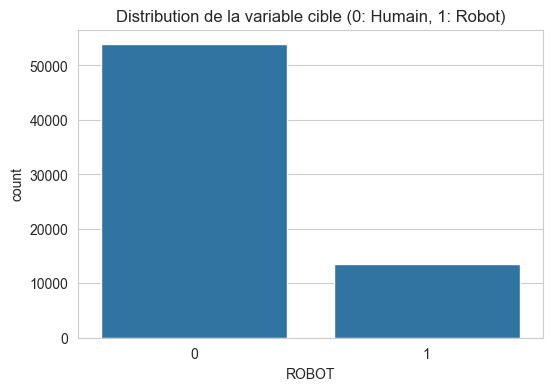

In [6]:
# Etude de l'équilibre des classes
plt.figure(figsize=(6, 4))
sns.countplot(x='ROBOT', data=df)
plt.title('Distribution de la variable cible (0: Humain, 1: Robot)')
class_counts = df['ROBOT'].value_counts(normalize=True) * 100
print(f"Distribution des classes:\n{class_counts}")

In [7]:
# Analyse des corrélations entre les features du dataset et identificatiosn d'éventuels outliers

# Corrélation entre les variables numériques
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Heatmap de corrélation des features')
plt.show()

# Distribution de quelques variables clés en fonction de la cible
features_to_plot = ['NUMBER_OF_REQUESTS', 'TOTAL_DURATION', 'AVERAGE_TIME', 'HTTP_RESPONSE_4XX', 'DATA']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='ROBOT', kde=True, bins=50)
    plt.title(f'Distribution de {feature} par classe')
    plt.yscale('log') # échelle logarithmique pour mieux voir les distributions
    plt.show()

# Box plots pour voir les outliers et les distributions
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='ROBOT', y=feature)
    plt.title(f'Boxplot de {feature} par classe')
    plt.yscale('log')
    plt.show()

ValueError: could not convert string to float: 'obSnwGoBCue8G08E_WCX'

<Figure size 2000x1500 with 0 Axes>